In [80]:
import numpy as np
import pylab as plt
import pandas as pd
import scipy.misc
import random
import glob
import os
from pprint import pprint
from sklearn.model_selection import train_test_split

%matplotlib inline

In [84]:
path2images = "/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IMG/"
pattern = "*.jpg"
path2csv = "/home/ubuntu/SDC/Behavioral-Cloning-Dataset/driving_log.csv"
path2csv_cleaned = "/home/ubuntu/SDC/Behavioral-Cloning-Dataset/driving_log_cleaned.csv"
path2csv_training = "/home/ubuntu/SDC/Behavioral-Cloning-Dataset/driving_log_training.csv"
path2csv_validation = "/home/ubuntu/SDC/Behavioral-Cloning-Dataset/driving_log_validation.csv"

# CSV Preprocessing

In [3]:
df = pd.read_csv(path2csv, names=["Center Image", "Left Image", "Right Image", "Steering Angle", "Throttle", "Break", "Speed"])
df.head()

,Center Image,Left Image,Right Image,Steering Angle,Throttle,Break,Speed
0,E:\Datos\Nanodegree self-driving car (coches a...,NaN,NaN,0.0,0.0,0,0.000020
1,E:\Datos\Nanodegree self-driving car (coches a...,NaN,NaN,0.0,0.0,0,0.000001
2,E:\Datos\Nanodegree self-driving car (coches a...,NaN,NaN,0.0,0.0,0,0.000004
3,E:\Datos\Nanodegree self-driving car (coches a...,NaN,NaN,0.0,0.0,0,0.000009
4,E:\Datos\Nanodegree self-driving car (coches a...,NaN,NaN,0.0,0.0,0,0.000022


In [4]:
df.dtypes

Center Image       object
Left Image         object
Right Image        object
Steering Angle    float64
Throttle          float64
Break               int64
Speed             float64
dtype: object

In [5]:
df.describe()

,Steering Angle,Throttle,Break,Speed
count,32708.000000,32708.000000,32708.0,3.270800e+04
mean,-0.037194,0.965536,0.0,2.934767e+01
std,0.123922,0.177693,0.0,4.216633e+00
min,-1.000000,0.000000,0.0,3.709483e-07
25%,-0.066667,1.000000,0.0,3.018963e+01
50%,0.000000,1.000000,0.0,3.019011e+01
75%,0.000000,1.000000,0.0,3.019029e+01
max,1.000000,1.000000,0.0,3.061606e+01


In [6]:
df.drop(["Left Image", "Right Image", "Break"], axis=1, inplace=True)

In [7]:
df.head()

,Center Image,Steering Angle,Throttle,Speed
0,E:\Datos\Nanodegree self-driving car (coches a...,0.0,0.0,0.000020
1,E:\Datos\Nanodegree self-driving car (coches a...,0.0,0.0,0.000001
2,E:\Datos\Nanodegree self-driving car (coches a...,0.0,0.0,0.000004
3,E:\Datos\Nanodegree self-driving car (coches a...,0.0,0.0,0.000009
4,E:\Datos\Nanodegree self-driving car (coches a...,0.0,0.0,0.000022


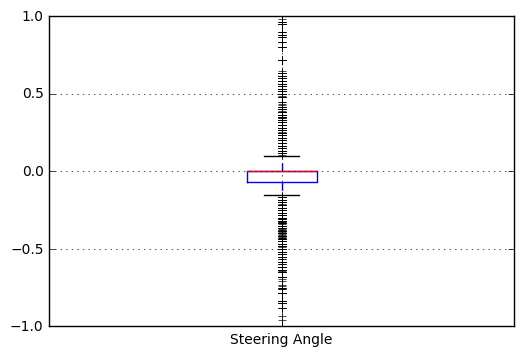

In [8]:
df[["Steering Angle"]].boxplot()

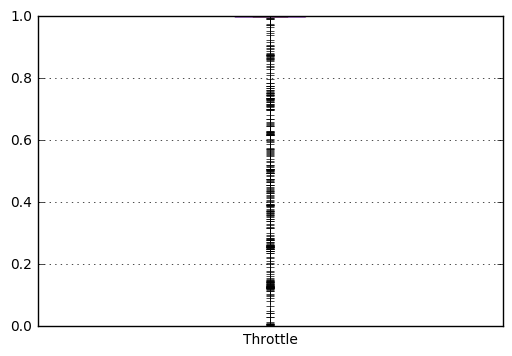

In [9]:
df[["Throttle"]].boxplot()

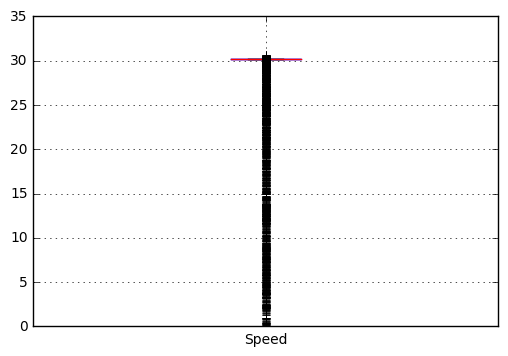

In [10]:
df[["Speed"]].boxplot()

In [11]:
df2 = df[["Center Image", "Steering Angle"]].copy()
df2.columns = ["Original image path", "Steering angle"]

In [12]:
string = df2.ix[0, "Original image path"]
string

'E:\\Datos\\Nanodegree self-driving car (coches autonomos)\\dataset_behavioral_cloning\\IMG\\center_2017_01_22_23_33_27_848.jpg'

In [13]:
os.path.basename(string)

'E:\\Datos\\Nanodegree self-driving car (coches autonomos)\\dataset_behavioral_cloning\\IMG\\center_2017_01_22_23_33_27_848.jpg'

It doesn't work because it is calling the Linux separator "/" but the simulator was run in Windows and the paths have the separator "\" 

In [15]:
string.split("\\")

['E:',
 'Datos',
 'Nanodegree self-driving car (coches autonomos)',
 'dataset_behavioral_cloning',
 'IMG',
 'center_2017_01_22_23_33_27_848.jpg']

In [16]:
updated_directory = "/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IMG/"

def update_path(path):
    return updated_directory + path.split("\\")[-1]


df2["Updated image path"] = df2["Original image path"].apply(update_path)

In [17]:
df2.head()

,Original image path,Steering angle,Updated image path
0,E:\Datos\Nanodegree self-driving car (coches a...,0.0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...
1,E:\Datos\Nanodegree self-driving car (coches a...,0.0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...
2,E:\Datos\Nanodegree self-driving car (coches a...,0.0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...
3,E:\Datos\Nanodegree self-driving car (coches a...,0.0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...
4,E:\Datos\Nanodegree self-driving car (coches a...,0.0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...


In [18]:
df2.ix[0, "Updated image path"]

'/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IMG/center_2017_01_22_23_33_27_848.jpg'

There are some images that were deleted because I ended up in the river or crashed against a tree, hence, need to be removed from the csv

In [19]:
rows_before = len(df2)
print("Rows before: %d" % rows_before)

Rows before: 32708


In [20]:
df2["Exists"] = df2["Updated image path"].apply(lambda x: os.path.exists(x))

In [21]:
df2.columns

Index(['Original image path', 'Steering angle', 'Updated image path',
       'Exists'],
      dtype='object')

In [22]:
df3 = df2[df2["Exists"] == True]
df3 = df3[["Updated image path", "Steering angle"]].copy()

In [23]:
rows_after = len(df3)
print("Rows after: %d" % rows_after)

Rows after: 32563


In [24]:
print("There were %d rows deleted" % (rows_before - rows_after))

There were 145 rows deleted


In [25]:
df3.to_csv(path2csv_cleaned, index=False)

# Image analysis

In [26]:
test_im = scipy.misc.imread(df3.ix[0, "Updated image path"])

In [27]:
test_im.shape

(160, 320, 3)

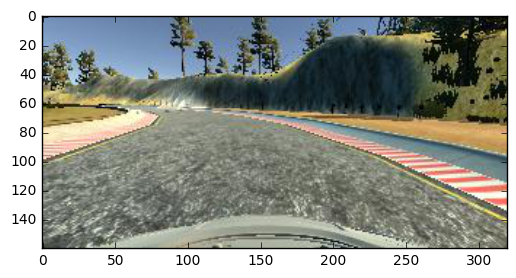

In [28]:
_ = plt.imshow(test_im)

Do we really need what is over the horizont? I mean, over 50pix seems there is no any relevant information. The same could apply to the pixeles below 140. Let's visualize some images.

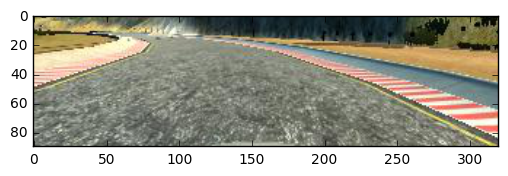

In [29]:
_ = plt.imshow(test_im[50:140, :])

Mmm... I suspect that visualizing the center of the car in the image will provide useful information such as "the piece I can see from the car should be in the center of the lane lines". Let's keep it.

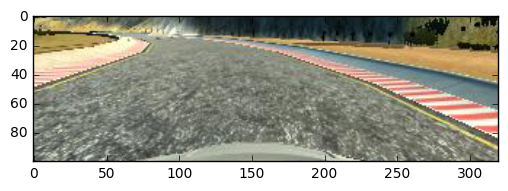

In [30]:
_ = plt.imshow(test_im[50:150, :])

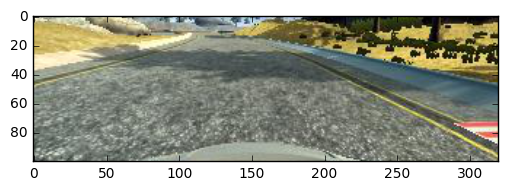

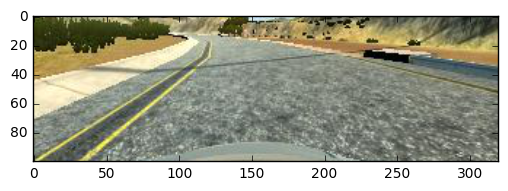

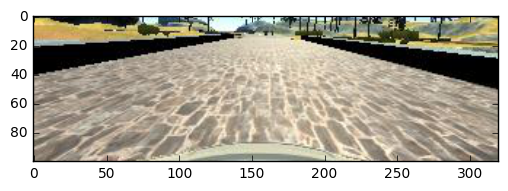

In [31]:
# Let's visualize 3 random images

np.random.seed(1234)
random1 = scipy.misc.imread(df3.ix[random.randint(0, len(df3)), "Updated image path"])
random2 = scipy.misc.imread(df3.ix[random.randint(0, len(df3)), "Updated image path"])
random3 = scipy.misc.imread(df3.ix[random.randint(0, len(df3)), "Updated image path"])

plt.figure()
_ = plt.imshow(random1[50:150, :])
plt.figure()
_ = plt.imshow(random2[50:150, :])
plt.figure()
_ = plt.imshow(random3[50:150, :])

Maybe we can be more restrictive cropping a bit more in the top, but as it is right now should be fine.

Every time we load an image we will have to apply a crop like img[50:150, :]

# Experimental setup: train/val splits

### Visualize angle distribution

In [82]:
df3.head()

,Updated image path,Steering angle,Bin
0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11
1,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11
2,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11
3,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11
4,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11


[   42    17    23    68    50   188   449  1264  4721  7981 16280   755
   307   247    21    71    15     8    24    32]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1. ]


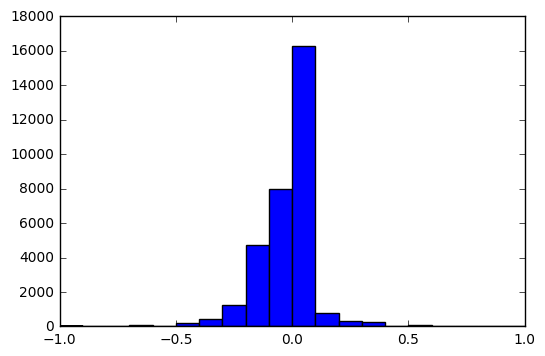

In [137]:
ret = plt.hist(df3['Steering angle'], 20)

count = ret[0].astype(np.int)
bins = ret[1]

print(count)
print(bins)

In [193]:
df3['Bin'] = np.digitize(df3['Steering angle'], bins)

In [194]:
Prob_bin_appearance = count/np.sum(count)

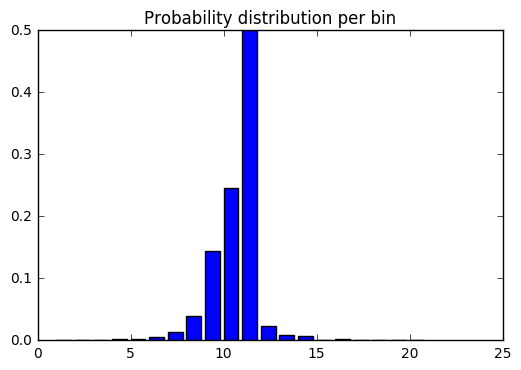

In [195]:
_ = plt.bar(range(1, len(Prob_bin_appearance)+1), Prob_bin_appearance)
_ = plt.title("Probability distribution per bin")

In [196]:
# converter maps bin id -> probability
converter = dict(zip(range(1,len(bins)), Prob_bin_appearance))
df3['Probability appearance'] = df3['Bin'].apply(lambda x: converter[x])

KeyError: 21

In [197]:
df3[df3['Bin'] == 21].head()

,Updated image path,Steering angle,Bin,Probability appearance
82,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,1.0,21,0.000983
83,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,1.0,21,0.000983
84,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,1.0,21,0.000983
85,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,1.0,21,0.000983
86,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,1.0,21,0.000983


The problem is the threshold operation: the right edge is not included in the bin. But there is an easy solution

In [198]:
df3.loc[df3['Bin'] == 21, 'Bin'] = 20

In [202]:
len(df3[df3['Bin'] == 20])

32

In [203]:
# Everything seems correct. Let's try it again
df3['Probability appearance'] = df3['Bin'].apply(lambda x: converter[x])

In [204]:
df3.head()

,Updated image path,Steering angle,Bin,Probability appearance
0,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11,0.499954
1,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11,0.499954
2,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11,0.499954
3,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11,0.499954
4,/home/ubuntu/SDC/Behavioral-Cloning-Dataset/IM...,0.0,11,0.499954


In [201]:
dualX = df3[['Updated image path', 'Probability appearance']].values
Y = df3['Steering angle'].values
Labels = df3['Bin'].values

dualX_train, dualX_validation, Y_train, Y_validation = \
train_test_split(dualX, Y,test_size=0.2, random_state=42 ,stratify=Labels)

X_train = dualX_train[:, 0]
Prob_appearance_train = dualX_train[:, 1]

X_validation = dualX_validation[:, 0]

# Probability appearance is only needed in training for data augmentation purposes in order to reduce the bias in this set.

# Train CSV
pd.DataFrame({'Updated image path': X_train, 'Steering angle': Y_train, 'Probability appearance': Prob_appearance_train})\
.to_csv(path2csv_training, index=False)
# Validation CSV
pd.DataFrame({'Updated image path': X_validation, 'Steering angle': Y_validation}).to_csv(path2csv_validation, index=False)